# Perceptron

### Prediction

$$
\begin{align*}
h(\mathbf{x}) &= \mathbf{w^\intercal x} + b \\
y &= \theta(h(\mathbf{x})) \\
\theta(x) &= \begin{cases}
        1 &  x \ge 0\\
        0 & x < 0 \\
    \end{cases} \\
\end{align*}
$$

### Gradient descent updates
$$
\begin{align*}
\Delta \mathbf{w} &= (y_i - \hat{y}_i) \cdot \mathbf{x}_i\\
\Delta b &= y_i - \hat{y}_i\\
\mathbf{w}_{t + 1} &= \mathbf{w}_{t} + \alpha \Delta \mathbf{w} \\
b_{t + 1} &= b_{t} + \alpha \Delta b \\
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from typing import Literal

class Perceptron:

    def __init__(self, lr: float=1e-1, max_iter: int=1000, optimization: Literal['bgd', 'sgd'] = 'bgd') -> None:
        """
        Perceptron is a linear binary classification algorithm.

        Parameters
        ----------
        lr : float, default=0.1
            Learning rate, step size used in gradient descent.
        
        max_iter : int, default=1000
            Number of iterations of gradient descent.

        optimization : str, default="bgd"
            Two possible variations of gradient descent, batch gradients descent (bgd) or stochastic gradient descent (sgd).
        """
        self.lr = lr
        self.max_iter = max_iter
        self.optimization = optimization

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the Perceptron model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """

        # Expand the input variables with bias terms
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        # Get the number of features
        n_features = X.shape[1]

        # Initialize weights to a zero vector of shape (n_features,)
        self.weights = np.zeros(n_features)

        if self.optimization == "sgd":

            for i in range(self.max_iter):

                for idx, x in enumerate(X):
                    
                    # Predict values using current parameters
                    y_pred = self._activation(np.dot(x, self.weights))
                    
                    # Gradient with respect to weights, calculated using a single sample
                    dw = (y[idx] - y_pred) * x

                    # Update the weights
                    self.weights += self.lr * dw

        elif self.optimization == "bgd":

            for i in range(self.max_iter):

                # Predict values using current parameters
                y_pred = self._activation(np.dot(X, self.weights))
                
                # Gradient with respect to weights, calculated using the entire training data
                dw = np.dot(X.T, (y - y_pred))

                # Update the weights
                self.weights += self.lr * dw

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the Perceptron model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """

        # Expand the input variables with bias terms
        X = np.hstack([np.ones((X.shape[0], 1)), X])

        # Predicted values are the dot product of samples and weights
        pred = np.dot(X, self.weights)

        # Predicted values are passed to the activation function
        return self._activation(pred)
    
    def _activation(self, y: np.ndarray) -> np.ndarray:
        """
        Helper method used for activation function.

        Parameters
        ----------
        y : numpy.ndarray
            Array of values of shape (n_samples,).

        Returns
        -------
        y_activation : numpy.ndarray
            Array of zeroes and ones of shape (n_samples,).
        """
        return np.where(y >= 0, 1, 0)
    
    def accuracy(self, y_pred, y_true) -> float:
        """
        Method for calculating accuracy.

        Parameters
        ----------
        y_pred : numpy.ndarray
            Array of predicted values of shape (n_samples,).

        y_true : numpy.ndarray
            Array of true values of shape (n_samples,).

        Returns
        -------
        accuracy : float
        """
        return np.mean(y_pred == y_true)

In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

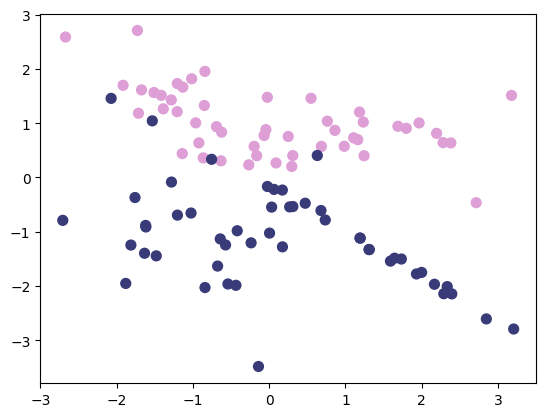

In [4]:
from sklearn.datasets import make_classification

X, y = make_classification(n_classes=2, n_features=2, n_informative=2, n_redundant=0, n_samples=100, n_clusters_per_class=2)
plot_2d_clf_problem(X, y)

Accuracy: 0.93


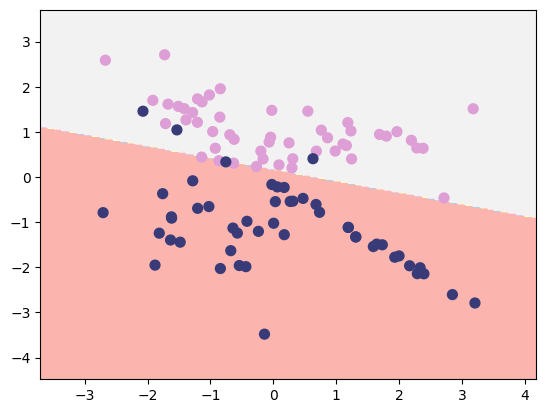

In [5]:
model = Perceptron(optimization="sgd", lr=1e-1, max_iter=1000)
model.fit(X, y)
y_pred = model.predict(X)
print(f'Accuracy: {model.accuracy(y_pred, y)}')
plot_2d_clf_problem(X, y, model.predict)